<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [50]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 28s 2us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [9]:
X_train[0].shape

(28, 28)

In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

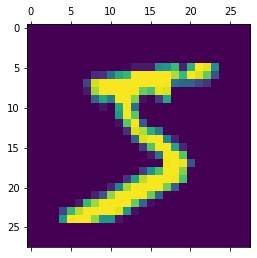

In [11]:
plt.matshow(X_train[0])

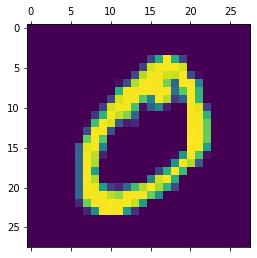

In [12]:
plt.matshow(X_train[1])

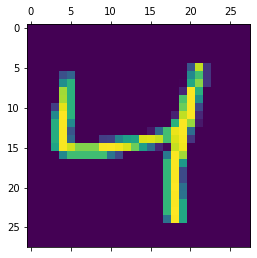

In [13]:
plt.matshow(X_train[2])

In [15]:
y_train[0]

5

In [16]:
y_train[2]

4

In [17]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [52]:
# Value should be scaled from 0 to 1 
# Scaling is a techinque which improves our machine learning model accurecy
X_train = X_train / 255
X_test = X_test / 255

In [46]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [53]:
X_train.shape

(60000, 28, 28)

In [54]:
len(X_train)

60000

In [24]:
X_train.reshape(len(X_train), 28*28)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [23]:
X_train.reshape(len(X_train), 28*28).shape

(60000, 784)

In [55]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [28]:
X_train_flattened.shape

(60000, 784)

In [30]:
X_test_flattened.shape

(10000, 784)

In [32]:
X_train_flattened[0].shape

(784,)

In [29]:
X_train_flattened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

<h3 style='color:purple'>Very simple neural network with no hidden layers</h3>

<img src="digits_nn.jpg" />

In [56]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
# 10 in output layers neurons here 0 to 9
# Dense means all the neuran at input layer is 
# connected to every neuron in output/second layer.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# In TensorFlow and Keras you have to compile all the time,
# where we compile neural network and we pass bunch of arguments.

# Optimizer allow you to train model efficiently,
# when the backword propogation and training is going on 
# optimizer will allow you to reach Global optima in efficient way.

# loss: categorical_crossentropy-->our output class is categorial, as we have category 0 t0 9.
# 10 classes in our output.
# sparce --> means our output variable Y_train is actually an integer no.,
# if it is one hot encoded array, you will use categorical_crossentropy


# REFERENCE : https://www.tensorflow.org/api_docs/python/tf/keras/losses

# we can use meansquare error, mean absolute error
# https://www.tensorflow.org/api_docs/python/tf/keras/losses/MeanAbsoluteError
# https://www.tensorflow.org/api_docs/python/tf/keras/losses/MeanSquaredError

# accurecy is the goal

model.fit(X_train_flattened, y_train, epochs=5)

2022-07-10 23:01:19.762969: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 2.1881 - accuracy: 0.5785
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.9773 - accuracy: 0.7049
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7907 - accuracy: 0.7391
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6268 - accuracy: 0.7604
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4839 - accuracy: 0.7754


In [57]:
# Before deploying model to production we always ,
# evaluate accuracy on test data set

model.evaluate(X_test_flattened, y_test)

 49/313 [===>..........................] - ETA: 0s - loss: 1.4857 - accuracy: 0.7500 

2022-07-10 23:01:52.688336: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 1ms/step - loss: 1.4040 - accuracy: 0.8003


[1.4039632081985474, 0.8003000020980835]

In [63]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]
# Prediction will be  coming array of 10 because 
# its giving us the percentage matching of every digit (0 to 9)
# we need to see the score which is maximum

array([0.32016098, 0.397695  , 0.35494307, 0.41779804, 0.47474563,
       0.37677532, 0.28541434, 0.8062656 , 0.3732752 , 0.58556014],
      dtype=float32)

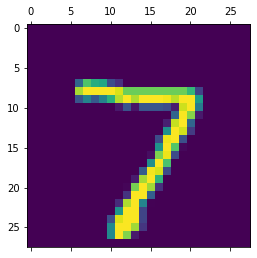

In [59]:
plt.matshow(X_test[0])

**np.argmax finds a maximum element  from an array and returns the index of it**

In [65]:
np.argmax(y_predicted[0])
# print the index of maximum value

7

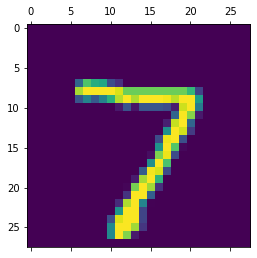

In [66]:
plt.matshow(X_test[0])

In [67]:
np.argmax(y_predicted[1])

2

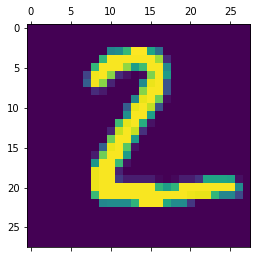

In [68]:
plt.matshow(X_test[1])

In [69]:
# Y_PREDICTED IS Arrays, so to have feel how it matches 
# to our expected results(0 to 9) do this
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [87]:
y_predicted_labels

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 4,
 7,
 0,
 6,
 9,
 0,
 1,
 3,
 9,
 7,
 3,
 4,
 7,
 6,
 4,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 0,
 7,
 2,
 7,
 1,
 1,
 1,
 1,
 7,
 4,
 1,
 3,
 3,
 3,
 2,
 4,
 4,
 6,
 3,
 5,
 3,
 2,
 0,
 4,
 1,
 9,
 1,
 7,
 8,
 9,
 2,
 7,
 9,
 2,
 4,
 3,
 0,
 7,
 0,
 2,
 8,
 1,
 7,
 3,
 7,
 1,
 7,
 9,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 1,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 4,
 9,
 2,
 1,
 9,
 4,
 8,
 1,
 3,
 9,
 7,
 9,
 4,
 4,
 9,
 7,
 3,
 6,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 3,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 1,
 9,
 9,
 5,
 3,
 1,
 5,
 6,
 0,
 3,
 1,
 4,
 6,
 5,
 4,
 6,
 3,
 4,
 1,
 1,
 9,
 4,
 7,
 3,
 3,
 2,
 1,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 3,
 9,
 2,
 3,
 0,
 1,
 1,
 1,
 0,
 4,
 0,
 1,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 3,
 2,
 9,
 4,
 7,
 9,
 1,
 9,
 0,
 3,
 5,
 7,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 1,
 8,
 7,
 7,
 9,
 2,
 2,
 4,
 1,
 3,
 3,
 8,
 7,
 1,
 6,
 0,
 6,
 4,
 1,


In [88]:
len(y_predicted_labels)

10000

In [73]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [76]:
len(y_test)

10000

In [77]:
y_test.shape

(10000,)

In [78]:
y_test[0]

7

In [86]:
# CONFUSION MATRIX
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 929,    2,    7,   11,    0,    1,   24,    1,    5,    0],
       [   0, 1109,    9,    4,    0,    0,    4,    0,    9,    0],
       [  19,   82,  792,   38,   15,    0,   30,   22,   33,    1],
       [   6,   50,   27,  865,    1,    2,    5,   24,   22,    8],
       [   2,   49,    3,    0,  767,    0,   28,    9,    4,  120],
       [  42,  113,    5,  214,   30,  362,   27,   40,   30,   29],
       [  29,   49,    8,    0,   13,    9,  849,    0,    1,    0],
       [   2,   70,   14,    2,   10,    0,    2,  900,    7,   21],
       [  25,   94,   10,  102,   14,    2,   16,   24,  659,   28],
       [  23,   43,    5,   12,   65,    0,    1,   82,    7,  771]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

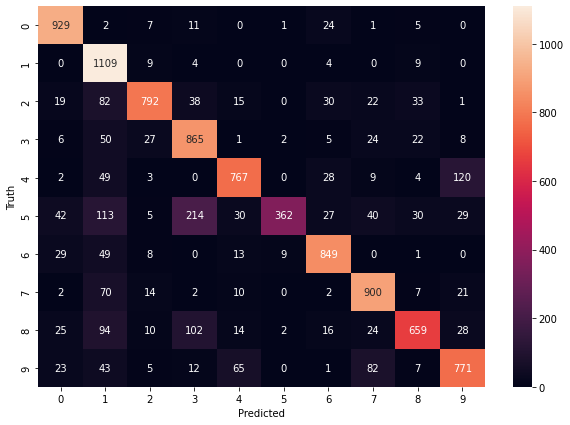

In [90]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
# Confusion matrix is a very good tool to evaluate the performance of our model

<h3 style='color:purple'>Using hidden layer</h3>

In [92]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'), 
    # here 100 is the no of nurons in hidden layer
    keras.layers.Dense(10, activation='sigmoid')
])

# last layer does not need input shape because whatever ,
# first layer is connected it knows how to figure out input shape from that

# there is no fix rule to specify the no of nurons in hidden layer,
# can be do trial and error( there is some ,
# guidelines--. which is less than input shape(784 here))

# will look into activation function Relu later , others tanh, liki etc


# when you add hidden layer neural network 
# will take some time to train model (test to do more computation)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)
# Keras comes with layer called flatten, 
# will use in next (inntraining)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2131 - accuracy: 0.7108
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5052 - accuracy: 0.8709
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3903 - accuracy: 0.8940
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3464 - accuracy: 0.9032
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3217 - accuracy: 0.9087


In [93]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3017 - accuracy: 0.9117


[0.3017403185367584, 0.9117000102996826]

Text(69.0, 0.5, 'Truth')

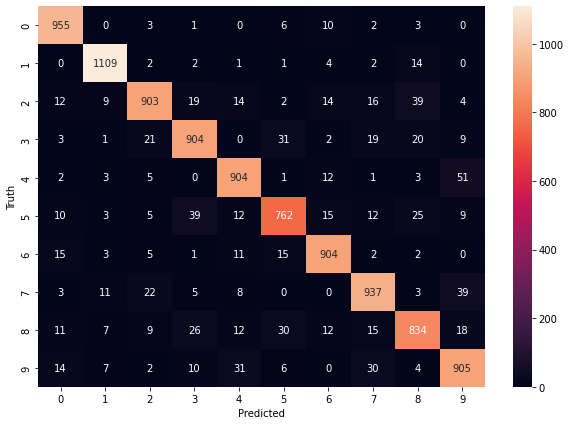

In [95]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# in perfect state we will have 0 in 
# all the black boxes except diagonal
# In diagonal we will have big number i.e., our model is perfect

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [96]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2095 - accuracy: 0.7097
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5112 - accuracy: 0.8676
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3910 - accuracy: 0.8932
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3454 - accuracy: 0.9033
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3199 - accuracy: 0.9089
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3025 - accuracy: 0.9133
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2889 - accuracy: 0.9168
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2778 - accuracy: 0.9194
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2677 - accuracy: 0.9227
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.258

In [99]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2503 - accuracy: 0.9271


[0.25028958916664124, 0.9271000027656555]

In [98]:
# TRY DIFFERENT OPTIMIZER AND  LOSS FUNCTION in above as HW(IN KERAS/TENSERFLOW)
# refer https://keras.io/api/losses/
# https://www.tensorflow.org/api_docs/python/tf/keras/losses
# try different value of matrics and optimizer
# also different valus of epoch, activation function etc...